![DHNB 2024](https://github.com/hibernator11/workshop-notebooks-dhnb2024/raw/main/images/dhnb.png)

# How to Get Started with YOLOv8


[YOLOv8](https://ultralytics.com/) is a group of neural network models, created and trained using the [PyTorch framework](https://pytorch.org/). It provides a single Python API to work with all of the models.

### YOLOv8 package can be installed by running the following command:

In [1]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/87/ac/fe69868ff03b9488504398018841edf9cd07bb77ce47aa32b1d13a8b52a5/ultralytics-8.2.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python>=4.6.0 from https://files.pythonhosted.org/packages/d9/64/7fdfb9386511cd6805451e012c537073a79a958a58795c4e602e538c388c/opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for torchvision>=0.9.0 from https://files.pythonhosted.org/packages/6e/7d/bc67ec2d1011226e75cdcc45a2c85d97b8eaac32a7d648b71c432d584367/torchvision-0.18.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for thop>=0.1.1 from https://files.pythonhosted.org/packages/bb/0f/72beeab4ff5221dc47127c80f8834b4bcd0cb36f6ba91c0b1d04a1233403/thop-0.1.1.post2209072238-py3-none-any.whl.metadata
  Ob

  Obtaining dependency information for nvidia-cufft-cu12==11.0.2.54 from https://files.pythonhosted.org/packages/86/94/eb540db023ce1d162e7bea9f8f5aa781d57c65aed513c33ee9a5123ead4d/nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for nvidia-curand-cu12==10.3.2.106 from https://files.pythonhosted.org/packages/44/31/4890b1c9abc496303412947fc7dcea3d14861720642b49e8ceed89636705/nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for nvidia-cusolver-cu12==11.4.5.107 from https://files.pythonhosted.org/packages/bc/1d/8de1e5c67099015c834315e333911273a8c6aaba78923dd1d1e25fc5f217/nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for nvidia-cusparse-cu12==12.1.0.106 from https://files.pythonhosted.org/packages/65/5b/cfaeebf25cd9fdec14338ccb16f6b2c4c7fa9163aefcf057d86b9cc248bb/nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.w

The ultralytics package has the YOLO class, used to create neural network models.

To get access to it, we need to import it in our Python code:

In [2]:
from ultralytics import YOLO

## Now everything is ready to create the neural network model:

YOLOv8 is a group of neural network models. These models were created and trained using PyTorch and exported to files with the .pt extension. 

|Classification|Detection|Segmentation|Description|
|--------------|---------|------------|----|
|yolov8n-cls.pt|yolov8n.pt|yolov8n-seg.pt|Nano|
|yolov8s-cls.pt|yolov8s.pt|yolov8s-seg.pt|Small|
|yolov8m-cls.pt|yolov8m.pt|yolov8m-seg.pt|Medium|
|yolov8l-cls.pt|yolov8l.pt|yolov8l-seg.pt|Large|
|yolov8x-cls.pt|yolov8x.pt|yolov8x-seg.pt|Huge|

The bigger the model you choose, the better the prediction quality you can achieve, and the slower it will work. 

In this example we will cover **object detection** as a task for computer vision. We selected the `yolov8m.pt`, a middle-sized model for object detection.

When you run this code for the first time, it will download the `yolov8m.pt` file from the Ultralytics server to the current folder. Then it will construct the model object.

In [3]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:01<00:00, 35.7MB/s]


All YOLOv8 models for object detection are pre-trained on the [COCO dataset](https://cocodataset.org/), which is a huge collection of images of **80 different types** (e.g., sheep, boat or person). So, if you do not have specific requirements, then you can just run it as is, without additional training. 

 We can run `predict` to detect all objects in a picture. The paramenter `save` indicates that we want to store the prediction. When we run the code we will see the ouput folder in which the prediction is saved. We can open later the predictions to explore the results.

In [4]:
results = model.predict("https://ultralytics.com/images/zidane.jpg", save=True)

100%|██████████| 165k/165k [00:00<00:00, 3.26MB/s]


image 1/1 /home/gustavo/Escritorio/dhnb/workshop-notebooks-dhnb2024/notebooks/zidane.jpg: 384x640 4 persons, 2 ties, 192.4ms
Speed: 1.6ms preprocess, 192.4ms inference, 238.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3


The predict method accepts many different input types such as a path to a single image, an array of paths to images, the Image object of the well-known PIL Python library, or a URL.

It returns an array of results for each input image. As we provided only a single image, it returns an array with a single item that it can extracted as follows:

In [5]:
result = results[0]

The result contains detected objects and properties. The most important one is the **boxes** array with information about detected bounding boxes on the image. You can determine how many objects were detected by running the `len` function:

In [6]:
len(result.boxes)

6

When we ran this, we got the number "6", which means that there are six boxes detected. Then you can analyze each box either in a loop or manually. Let's get the first one:

In [7]:
box = result.boxes[0]

The box object contains the properties of the bounding box, including:

- xyxy – the coordinates of the box as an array [x1,y1,x2,y2]
- cls – the ID of object type
- conf – the confidence level of the model about this object. **If it's very low, like < 0.5, then you can just ignore the box**.

Let's print information about the detected box:

In [8]:
print("Object type:", box.cls[0])
print("Coordinates:", box.xyxy[0])
print("Probability:", box.conf[0])

Object type: tensor(0.)
Coordinates: tensor([ 120.3708,  197.7915, 1120.3849,  711.5365])
Probability: tensor(0.9455)


YOLOv8 contains PyTorch models. The outputs from the PyTorch models are encoded as an array of PyTorch Tensor objects, so you need to extract the first item from each of these arrays.

To unpack actual values from Tensor, we need to use the `.tolist()` method for tensors with an array (a list of items) inside, as well as the `.item()` method for tensors with single values.

Let's extract the data to the appropriate variables:

In [9]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [120.37075805664062, 197.79150390625, 1120.3848876953125, 711.5364990234375]
Probability: 0.9454790949821472


The object type is 0 here. 

All objects that the neural network can detect have numeric IDs. In case of a YOLOv8 pretrained model, there are 80 object types with IDs from 0 to 79. These corresponds to the COCO object classes. In addition, the YOLOv8 result object contains the names property to get these classes:

In [10]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

This dictionary has everything that this model can detect. Now you can find that 0 is "person", so this bounding box is the bounding box for detected Person. 

Let's modify the output to show results in a more representative way. In this code we rounded all coordinates. Then we got the name of the detected object class by ID using the `result.names` dictionary (we use the integer as the position in the array with all the class names). We also rounded the probability.

In [11]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: person
Coordinates: [120, 198, 1120, 712]
Probability: 0.95


As you can see the probability is good enough. Let's now write some code to get this information for all detected boxes in a loop:

In [12]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: person
Coordinates: [120, 198, 1120, 712]
Probability: 0.95
---
Object type: person
Coordinates: [746, 41, 1139, 711]
Probability: 0.92
---
Object type: tie
Coordinates: [435, 437, 525, 717]
Probability: 0.83
---
Object type: tie
Coordinates: [990, 316, 1132, 701]
Probability: 0.3
---
Object type: person
Coordinates: [1100, 395, 1279, 715]
Probability: 0.3
---
Object type: person
Coordinates: [0, 596, 124, 720]
Probability: 0.26
---


#### Finally we can see the prediction results

Please, update the filename parameter to the value provided in the cell output (e.g., "Results saved to runs/detect/predict6") when we run the `predict` method.

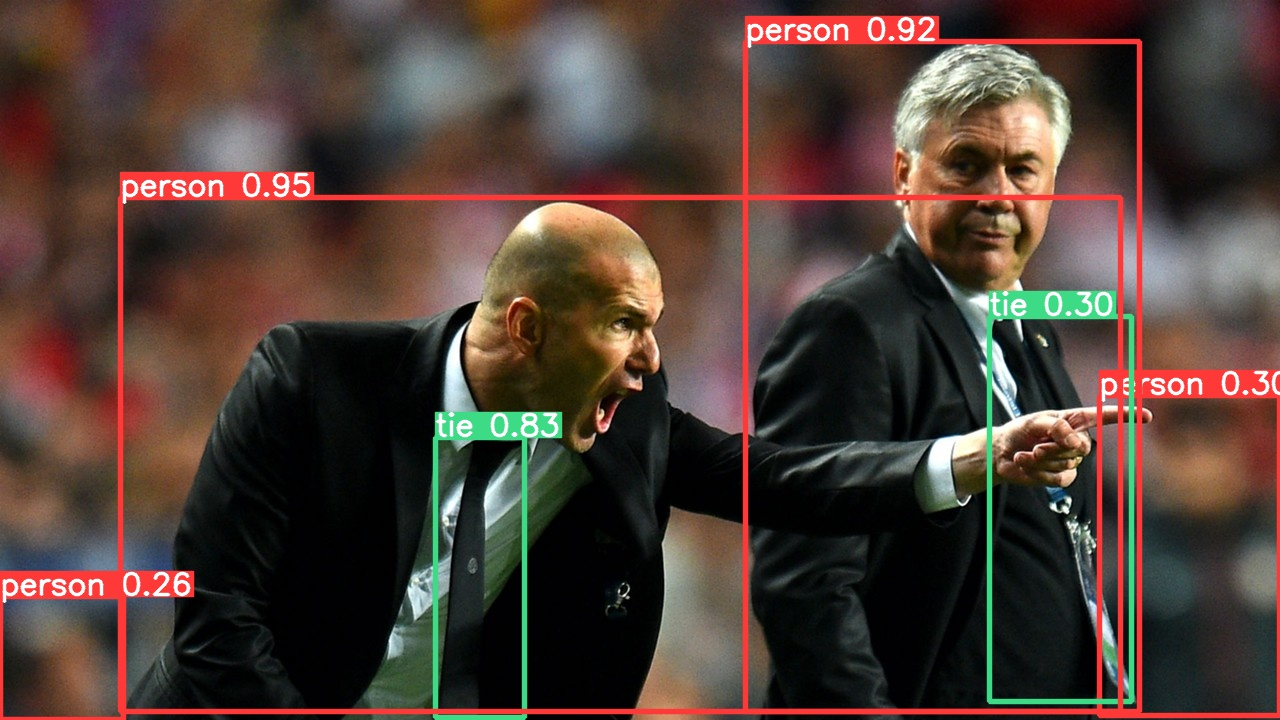

In [14]:
from IPython.display import Image
Image(filename='runs/detect/predict3/zidane.jpg', width=600)

https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/#get_started